<a href="https://colab.research.google.com/github/hocamachoc/3x2hs_measurements/blob/master/lopes-hugo_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Shared/Miguel/lifepro/scrapers/lopes

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/.shortcut-targets-by-id/1bbz48Xbp5oE5fE6z5Bi4aHKvtZb7neys/lifepro/scrapers/lopes


In [3]:
filename = "20220730122155/RENT/ChIJ0WGkg4FEzpQRrlsz_whLqZs/properties.json.gz"
df = pd.read_json(filename)
df.dtypes

id                         object
sku                        object
label                      object
type                       object
imageAlternateText         object
priceFormat                object
fullMonthlyPriceFormat     object
subPrice                   object
name                       object
street                     object
neighborhood               object
attributes                 object
pathUrl                    object
photo                      object
geolocation                object
lat                       float64
lng                       float64
productType                object
locationDTO                object
dealType                   object
divisionUnitType           object
analytics                  object
tag                        object
isBargain                    bool
description                object
descriptionResume          object
sellingPriceFormat         object
dtype: object

In [4]:
df = df[[
    # 'id', 'sku', 'label', 'type', 'imageAlternateText',
    # 'priceFormat',
    'fullMonthlyPriceFormat', 'subPrice',
    # 'name',
    # 'street', 'neighborhood',
    'attributes',
    # 'pathUrl', 'photo', 'geolocation',
    'lat', 'lng',
    # 'productType',
    'locationDTO', 'dealType', 'divisionUnitType',
    # 'analytics', 'tag', 'isBargain', 'description', 'descriptionResume',
    # 'sellingPriceFormat'
]].copy()
df.head(2)

,fullMonthlyPriceFormat,subPrice,attributes,lat,lng,locationDTO,dealType,divisionUnitType
0,R$ 9.500,Aluguel: R$ 8.500&nbsp;&nbsp; Condomínio: R$ 6...,"[{'type': 'area_attr', 'name': 'Área do imóvel...",-23.587893,-46.673140,{'address': 'Doutor Eduardo De Souza Aranha 14...,rent,Apartamento
1,R$ 8.800,Aluguel: R$ 7.900&nbsp;&nbsp; IPTU: R$ 900,"[{'type': 'area_attr', 'name': 'Área do imóvel...",-23.583896,-46.640405,"{'address': 'Doutor Fabrício Vampré', 'city': ...",rent,Sobrado


In [5]:
def get_prices(df):
    """
    Prices. TODO: subPrice can give aluguel, condominio and iptu
    """
    df = df.copy()
    df['price'] = df['fullMonthlyPriceFormat'] \
        .astype('string') \
        .str.extract(r'(\d+\.\d+)') \
        .astype(float) * 1000.0
    return df.drop(['fullMonthlyPriceFormat', 'subPrice'], axis=1)

df = get_prices(df)
df.head()

,attributes,lat,lng,locationDTO,dealType,divisionUnitType,price
0,"[{'type': 'area_attr', 'name': 'Área do imóvel...",-23.587893,-46.673140,{'address': 'Doutor Eduardo De Souza Aranha 14...,rent,Apartamento,9500.0
1,"[{'type': 'area_attr', 'name': 'Área do imóvel...",-23.583896,-46.640405,"{'address': 'Doutor Fabrício Vampré', 'city': ...",rent,Sobrado,8800.0
2,"[{'type': 'area_attr', 'name': 'Área do imóvel...",-23.562264,-46.655823,"{'address': 'Paulista', 'city': 'São Paulo', '...",rent,Salas,25612.0
3,"[{'type': 'area_attr', 'name': 'Área do imóvel...",-23.562264,-46.655823,"{'address': 'Paulista', 'city': 'São Paulo', '...",rent,Salas,25612.0
4,"[{'type': 'area_attr', 'name': 'Área do imóvel...",-23.562264,-46.655823,"{'address': 'Paulista', 'city': 'São Paulo', '...",rent,Salas,25612.0


In [6]:
def get_attributes(df):
    df = df.copy()
    columns = [str(d['type']).replace('_attr', '') for d in df['attributes'][0]]
    for ii, col in enumerate(columns):
        df[col] = pd.DataFrame(df['attributes'].tolist())[ii] \
            .apply(pd.Series)['value'].astype('string')
    df['area'] = pd.to_numeric(df['area'].str.replace('m²', ''))
    df['bedroom'] = pd.to_numeric(df['bedroom'])
    df['bathroom'] = pd.to_numeric(df['bathroom'])
    df['parking_lots'] = pd.to_numeric(df['parking_lots'])
    return df.drop(['attributes'], axis=1)

df = get_attributes(df)
df.head()

Streaming output truncated to the last 5000 lines.
<ipython-input-6-ee80224d6b1d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  .apply(pd.Series)['value'].astype('string')
<ipython-input-6-ee80224d6b1d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  .apply(pd.Series)['value'].astype('string')
<ipython-input-6-ee80224d6b1d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  .apply(pd.Series)['value'].astype('string')
<ipython-input-6-ee80224d6b1d>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  .apply(pd.Series)['value'].as

,lat,lng,locationDTO,dealType,divisionUnitType,price,area,bedroom,bathroom,parking_lots
0,-23.587893,-46.673140,{'address': 'Doutor Eduardo De Souza Aranha 14...,rent,Apartamento,9500.0,91.0,3.0,2.0,1.0
1,-23.583896,-46.640405,"{'address': 'Doutor Fabrício Vampré', 'city': ...",rent,Sobrado,8800.0,310.0,4.0,5.0,8.0
2,-23.562264,-46.655823,"{'address': 'Paulista', 'city': 'São Paulo', '...",rent,Salas,25612.0,350.0,0.0,4.0,2.0
3,-23.562264,-46.655823,"{'address': 'Paulista', 'city': 'São Paulo', '...",rent,Salas,25612.0,350.0,0.0,4.0,2.0
4,-23.562264,-46.655823,"{'address': 'Paulista', 'city': 'São Paulo', '...",rent,Salas,25612.0,350.0,0.0,4.0,2.0


In [7]:
def get_location(df):
    df = df.copy()
    df = pd.concat([df, df['locationDTO'].apply(pd.Series)], axis=1)
    df['address'] = df['address'].astype('string')
    df['city'] = df['city'].astype('string')
    df['neighborhood'] = df['neighborhood'].astype('string')
    df['number'] = pd.to_numeric(df['number'], errors='coerce')
    df['uf'] = df['uf'].astype('string')
    return df.drop(['locationDTO'], axis=1)

df = get_location(df)
df.head()

,lat,lng,dealType,divisionUnitType,price,area,bedroom,bathroom,parking_lots,address,city,neighborhood,number,uf
0,-23.587893,-46.673140,rent,Apartamento,9500.0,91.0,3.0,2.0,1.0,Doutor Eduardo De Souza Aranha 140,São Paulo,Vila Nova Conceição,140.0,sp
1,-23.583896,-46.640405,rent,Sobrado,8800.0,310.0,4.0,5.0,8.0,Doutor Fabrício Vampré,São Paulo,Vila Mariana,42.0,sp
2,-23.562264,-46.655823,rent,Salas,25612.0,350.0,0.0,4.0,2.0,Paulista,São Paulo,Bela Vista,1499.0,sp
3,-23.562264,-46.655823,rent,Salas,25612.0,350.0,0.0,4.0,2.0,Paulista,São Paulo,Bela Vista,1499.0,sp
4,-23.562264,-46.655823,rent,Salas,25612.0,350.0,0.0,4.0,2.0,Paulista,São Paulo,Bela Vista,1499.0,sp


In [8]:
df = df.astype({'dealType': 'string', 'divisionUnitType': 'string'}).copy()
df.head()

,lat,lng,dealType,divisionUnitType,price,area,bedroom,bathroom,parking_lots,address,city,neighborhood,number,uf
0,-23.587893,-46.673140,rent,Apartamento,9500.0,91.0,3.0,2.0,1.0,Doutor Eduardo De Souza Aranha 140,São Paulo,Vila Nova Conceição,140.0,sp
1,-23.583896,-46.640405,rent,Sobrado,8800.0,310.0,4.0,5.0,8.0,Doutor Fabrício Vampré,São Paulo,Vila Mariana,42.0,sp
2,-23.562264,-46.655823,rent,Salas,25612.0,350.0,0.0,4.0,2.0,Paulista,São Paulo,Bela Vista,1499.0,sp
3,-23.562264,-46.655823,rent,Salas,25612.0,350.0,0.0,4.0,2.0,Paulista,São Paulo,Bela Vista,1499.0,sp
4,-23.562264,-46.655823,rent,Salas,25612.0,350.0,0.0,4.0,2.0,Paulista,São Paulo,Bela Vista,1499.0,sp


In [9]:
df.dtypes

lat                 float64
lng                 float64
dealType             string
divisionUnitType     string
price               float64
area                float64
bedroom             float64
bathroom            float64
parking_lots        float64
address              string
city                 string
neighborhood         string
number              float64
uf                   string
dtype: object

In [10]:
# Duplicated?
df.loc[df.duplicated()]

,lat,lng,dealType,divisionUnitType,price,area,bedroom,bathroom,parking_lots,address,city,neighborhood,number,uf
3,-23.562264,-46.655823,rent,Salas,25612.0,350.0,0.0,4.0,2.0,Paulista,São Paulo,Bela Vista,1499.0,sp
4,-23.562264,-46.655823,rent,Salas,25612.0,350.0,0.0,4.0,2.0,Paulista,São Paulo,Bela Vista,1499.0,sp
52,-23.631236,-46.713438,sale,Salas,113700.0,1137.0,0.0,0.0,30.0,Verbo Divino,São Paulo,Chácara Santo Antônio,2001.0,sp
105,-23.560656,-46.695291,rent,Salas,65535.0,308.0,0.0,2.0,10.0,Brigadeiro Faria Lima,São Paulo,Pinheiros,201.0,sp
107,-23.560656,-46.695291,rent,Salas,65535.0,308.0,0.0,2.0,10.0,Brigadeiro Faria Lima,São Paulo,Pinheiros,201.0,sp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15712,-23.534420,-46.668357,rent,Salas,2320.0,37.0,0.0,2.0,2.0,Itapicuru,São Paulo,Perdizes,369.0,sp
15715,-23.534420,-46.668357,rent,Salas,2320.0,33.0,0.0,1.0,2.0,Itapicuru,São Paulo,Perdizes,369.0,sp
15734,-23.534420,-46.668357,rent,Salas,2585.0,33.0,0.0,1.0,2.0,Itapicuru,São Paulo,Perdizes,369.0,sp
15735,-23.534420,-46.668357,rent,Salas,2585.0,33.0,0.0,1.0,2.0,Itapicuru,São Paulo,Perdizes,369.0,sp


In [11]:
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()

In [12]:
# Missing values?
df.isna().sum()

lat                    0
lng                    0
dealType               0
divisionUnitType       0
price                 79
area                   1
bedroom               36
bathroom             781
parking_lots        4599
address                0
city                   0
neighborhood           0
number                42
uf                     0
dtype: int64

In [13]:
# Missing prices
df = df[~df['price'].isna()].copy()

In [25]:
df

,lat,lng,dealType,divisionUnitType,price,area,bedroom,bathroom,parking_lots,address,city,neighborhood,number,uf
0,-23.587893,-46.673140,rent,Apartamento,9500.0,91.0,3.0,2.0,1.0,Doutor Eduardo De Souza Aranha 140,São Paulo,Vila Nova Conceição,140.0,sp
1,-23.583896,-46.640405,rent,Sobrado,8800.0,310.0,4.0,5.0,8.0,Doutor Fabrício Vampré,São Paulo,Vila Mariana,42.0,sp
2,-23.562264,-46.655823,rent,Salas,25612.0,350.0,0.0,4.0,2.0,Paulista,São Paulo,Bela Vista,1499.0,sp
3,-23.562264,-46.655823,rent,Salas,25612.0,350.0,0.0,4.0,2.0,Paulista,São Paulo,Jardim América,1499.0,sp
4,-23.575510,-46.643047,sale,Apartamento,8382.0,150.0,3.0,3.0,2.0,Doutor Tomás Carvalhal,São Paulo,Paraíso,347.0,sp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,-23.570359,-46.608746,rent,Galpão,35500.0,800.0,0.0,0.0,10.0,Lima Barreto,São Paulo,Ipiranga,318.0,sp
14368,-23.571693,-46.651326,rent,Salas,1801.0,36.0,1.0,1.0,1.0,Manoel Da Nóbrega,São Paulo,Paraíso,595.0,sp
14369,-23.649564,-46.643869,sale,Apartamento,2290.0,52.0,2.0,1.0,1.0,Das Seringueiras,São Paulo,Jabaquara,263.0,sp
14370,-23.600433,-46.729326,rent,Apartamento,5449.0,160.0,3.0,5.0,4.0,Armando Barreto,São Paulo,Morumbi,274.0,sp


In [14]:
# Are there sales?
df['dealType'].value_counts()

rent    8846
sale    5447
Name: dealType, dtype: Int64

In [50]:
# Types
df['divisionUnitType'].value_counts()

Salas                 4038
Apartamento           4031
Sobrado               1431
Casa                   971
Prédio inteiro         940
Galpão                 582
Loja                   462
Salão Comercial        419
Lajes Corporativas     319
Condomínio             218
Casa térrea            209
Terreno                190
Cobertura              163
Studio                  87
Casa de vila            75
Flat                    71
Duplex                  44
Mall                    22
Loft                     7
Triplex                  4
Depósito                 3
Barracão                 2
Vaga                     1
Loteamento               1
Penthouse                1
Área de Terra            1
Hotel                    1
Name: divisionUnitType, dtype: Int64

In [51]:
# Types
df['neighborhood'].value_counts()

Santana                                698
Jardim Paulista                        680
Brooklin                               678
Bela Vista                             655
Pinheiros                              579
                                      ... 
Vila Ivone                               1
Presidente Altino                        1
Vila Matias                              1
Jardim Celeste                           1
Vila Campesina                           1
Name: neighborhood, Length: 298, dtype: Int64

In [53]:
df.query('dealType == "rent" and divisionUnitType == "Apartamento"')['neighborhood'].value_counts()

Jardim Paulista                        174
Jardim América                         146
Bela Vista                             126
Moema                                  116
Itaim Bibi                             102
                                      ... 
Água Fria                                1
Vila Bertioga                            1
Vila Ivone                               1
Fundação                                 1
Vila Palmares                            1
Name: neighborhood, Length: 147, dtype: Int64

In [54]:
df.query('dealType == "rent" and divisionUnitType == "Casa"')['neighborhood'].value_counts()

Pinheiros              27
Vila Mariana           20
Santana                19
Brooklin               17
Perdizes               15
                       ..
Mandaqui                1
Campo Limpo             1
Vila Isolina Mazzei     1
Mooca                   1
Liberdade               1
Name: neighborhood, Length: 106, dtype: Int64

# 2

In [31]:
df.query('dealType == "sale"')['price'].describe()

count      5447.000000
mean      18050.937764
std       31388.838613
min        1088.000000
25%        4947.500000
50%        9860.000000
75%       19202.000000
max      693578.000000
Name: price, dtype: float64

In [34]:
df.query('dealType == "rent" and divisionUnitType == "Apartamento"')['price'].describe()

count      2321.000000
mean       8291.629470
std        9311.707957
min        1000.000000
25%        3072.000000
50%        5176.000000
75%        9820.000000
max      115532.000000
Name: price, dtype: float64

[None]

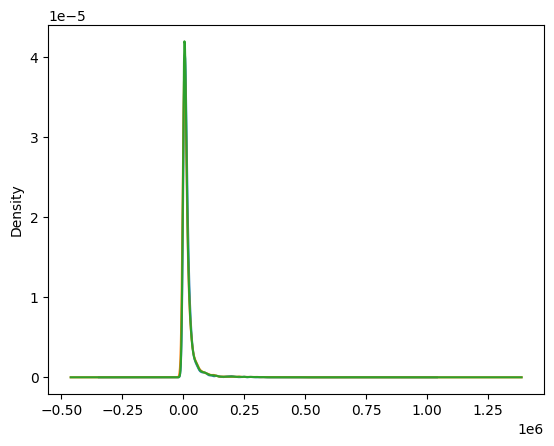

In [33]:
ax = df.query('dealType == "sale"')['price'].plot(kind='kde')
ax = df.query('dealType == "rent"')['price'].plot(kind='kde')
ax = df['price'].plot(kind='kde')
ax.set(xscale='linear')

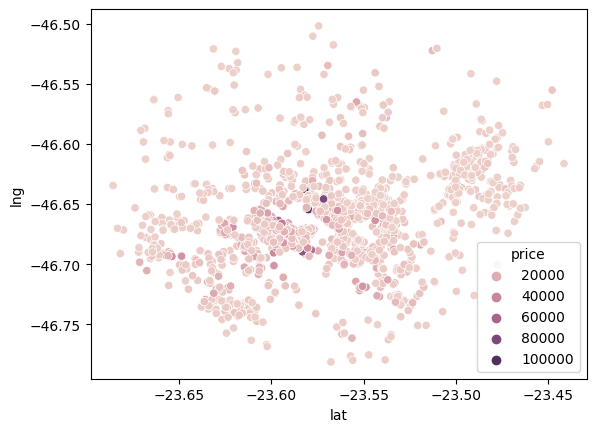

In [43]:
sns.scatterplot(
    data=df.query('dealType == "rent" and divisionUnitType == "Apartamento"'),
    x='lat', y='lng', hue='price'
);

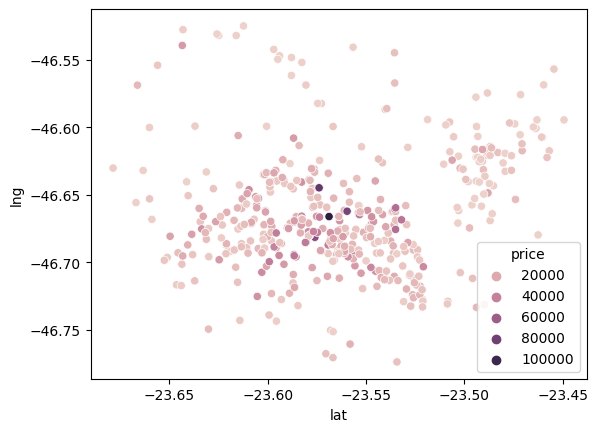

In [44]:
sns.scatterplot(
    data=df.query('dealType == "rent" and divisionUnitType == "Casa"'),
    x='lat', y='lng', hue='price'
);

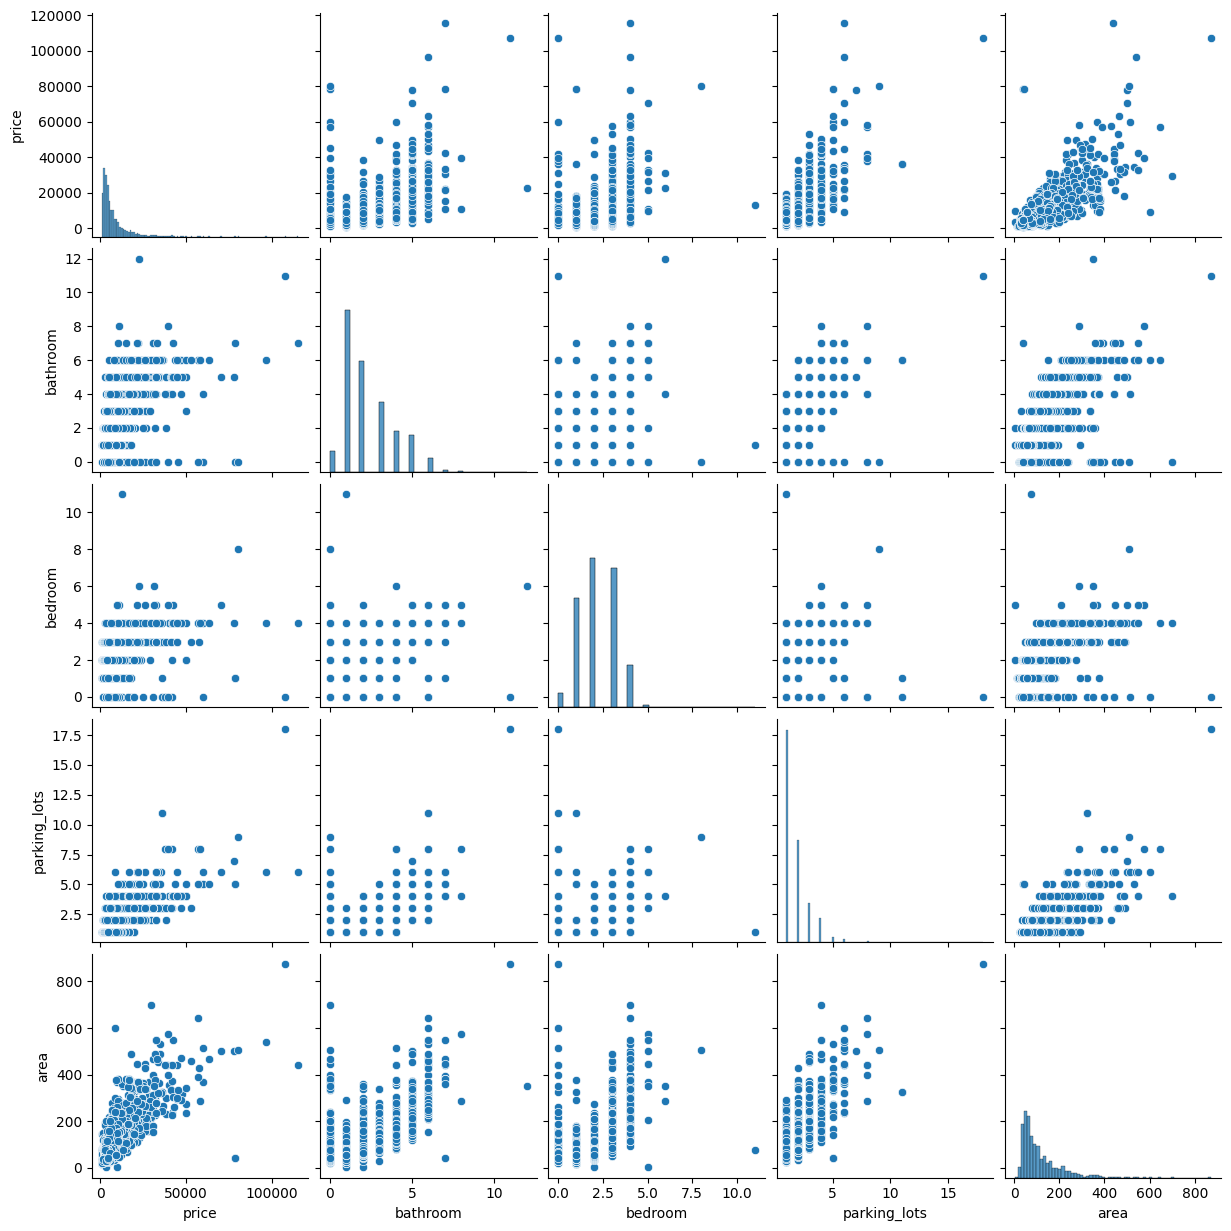

In [47]:
sns.pairplot(
    df.query('dealType == "rent" and divisionUnitType == "Apartamento"'),
    vars=[
        'price', 'bathroom', 'bedroom', 'parking_lots', 'area'
    ]
);

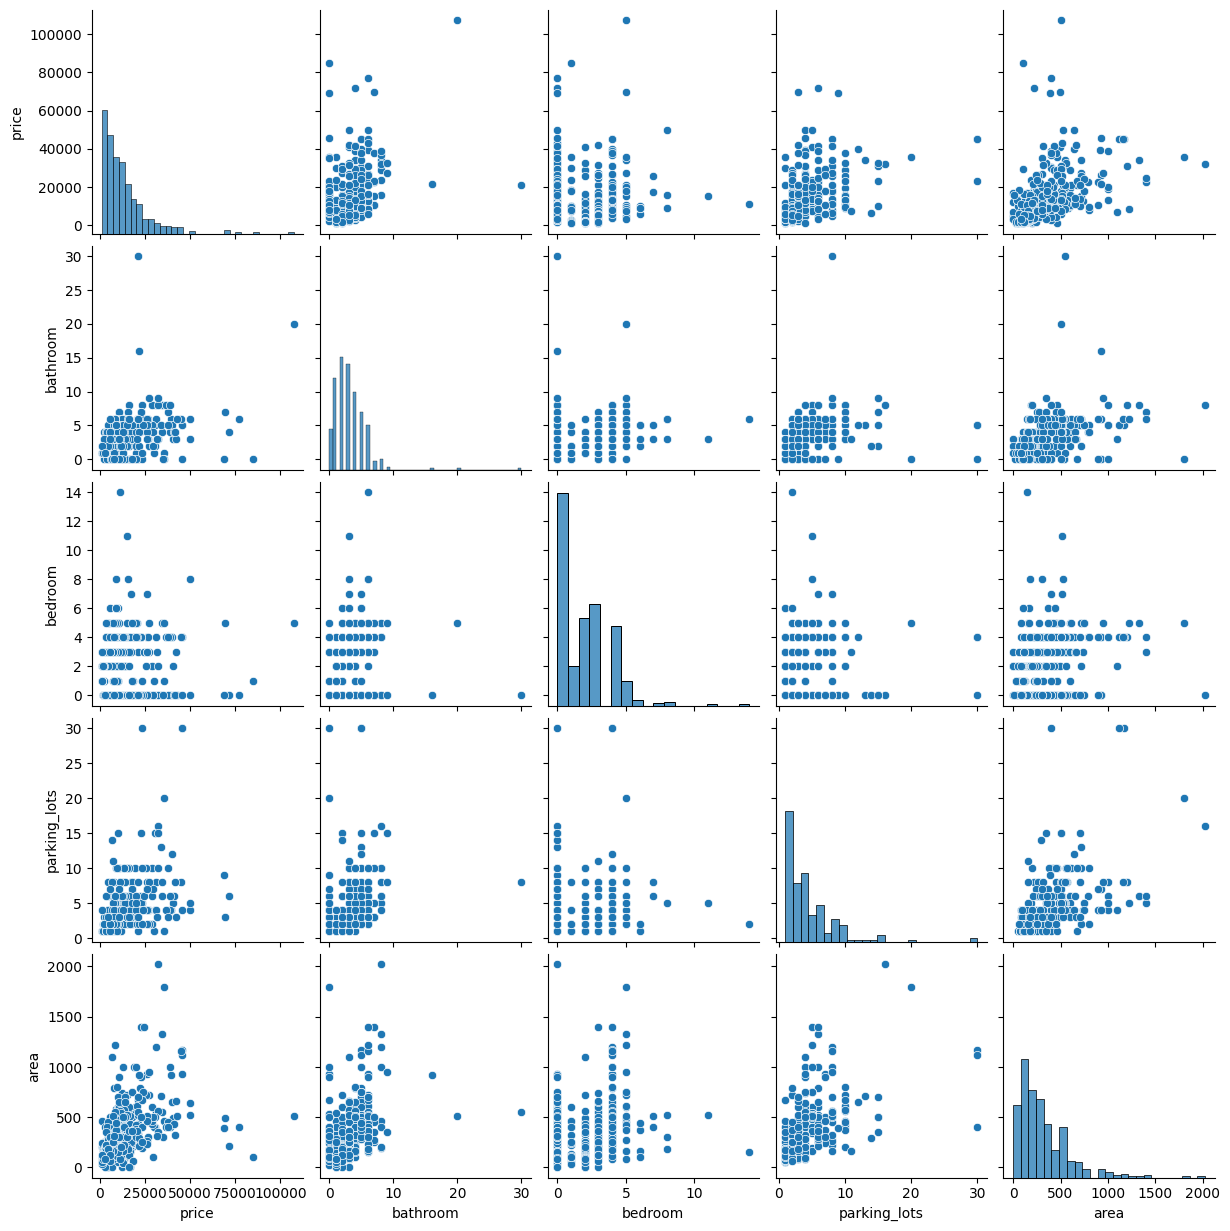

In [48]:
sns.pairplot(
    df.query('dealType == "rent" and divisionUnitType == "Casa"'),
    vars=[
        'price', 'bathroom', 'bedroom', 'parking_lots', 'area'
    ]
)